In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
# Общая информация
print("Размер данных:", df.shape)
print("\n Первые строки:")
print(df.head())
print("\n Пропущенные значения:")
print(df.isnull().sum())

Размер данных: (891, 12)

 Первые строки:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0     

### Гипотеза: количество погибших пассажиров должно быть больше, чем выживших, поскольку спасательных средств было ограниченное количество

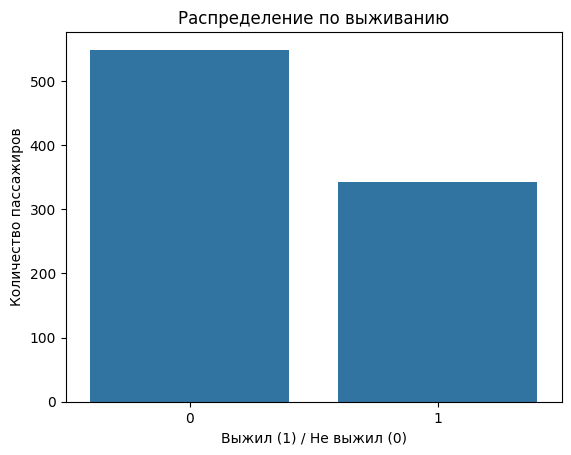

In [4]:
# Целевой признак
sns.countplot(data=df, x="Survived")
plt.title("Распределение по выживанию")
plt.xlabel("Выжил (1) / Не выжил (0)")
plt.ylabel("Количество пассажиров")
plt.show()

### Вывод: гипотеза подтверждается — погибших действительно больше, чем выживших

### Гипотеза: женщины должны были выживать чаще мужчин из-за приоритетной эвакуации женщин и детей на спасательные шлюпки

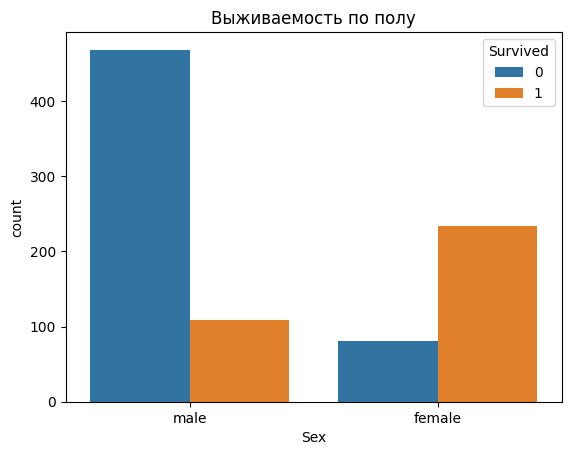

In [5]:
# Распределение по полу и выживанию
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Выживаемость по полу")
plt.show()

### Вывод: гипотеза подтвердилась — доля выживших женщин значительно выше, чем мужчин

### Гипотеза: пассажиры 1 класса должны были выживать чаще, так как находились ближе к палубе и имели лучший доступ к шлюпкам

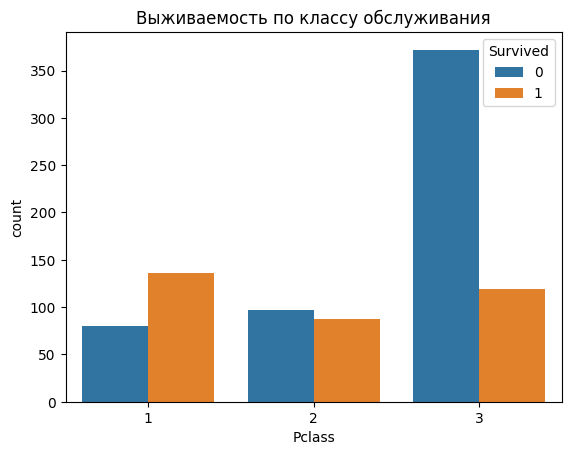

In [6]:
# Выживаемость по классу
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Выживаемость по классу обслуживания")
plt.show()

### Вывод: гипотеза подтверждается — пассажиры 1 класса действительно выживали существенно чаще других

### Гипотеза: дети и молодые люди должны были иметь более высокую выживаемость, так как детей эвакуировали в первую очередь

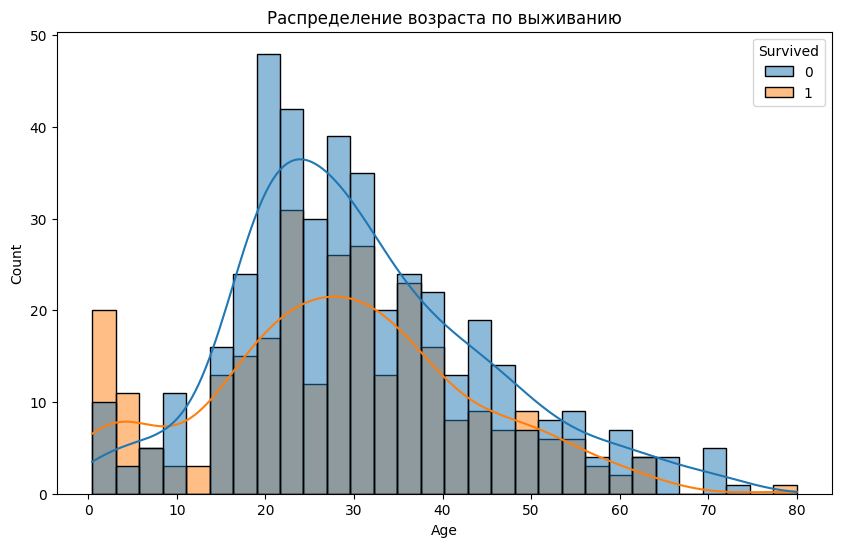

In [7]:
# Возраст и выживание
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Распределение возраста по выживанию")
plt.show()

### Вывод: гипотеза частично подтверждается — маленькие дети выживали чаще, но у взрослых выживаемость распределена менее равномерно

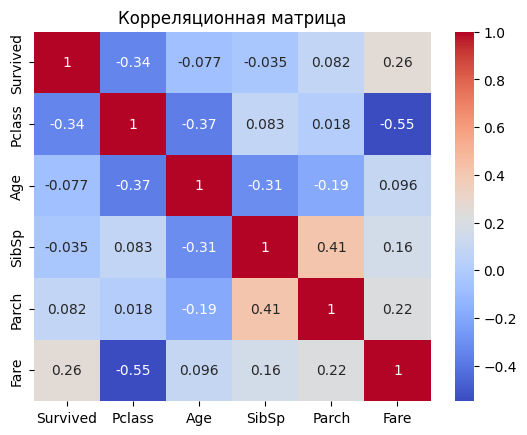

In [8]:
# Корреляции
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

### Выводы по корреляции:
### Класс билета имеет умеренную отрицательную корреляцию с выживанием (чем выше класс, тем больше шансов выжить)
### Цена билета (Fare) связана с классом билета (дороже в 1-м классе)
### Возраст и выживаемость не сильно коррелируют